In [ ]:
1. Tasks to Perform

In [ ]:
a. Dataset Selection
● Dataset Name: housing.csv
● Key Columns:
○ Size: Numeric (e.g., in square feet).
○ Location: Categorical (e.g., urban, suburban, rural).
○ Number of Rooms: Numeric.
○ Price: Numeric (target variable).


First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entri

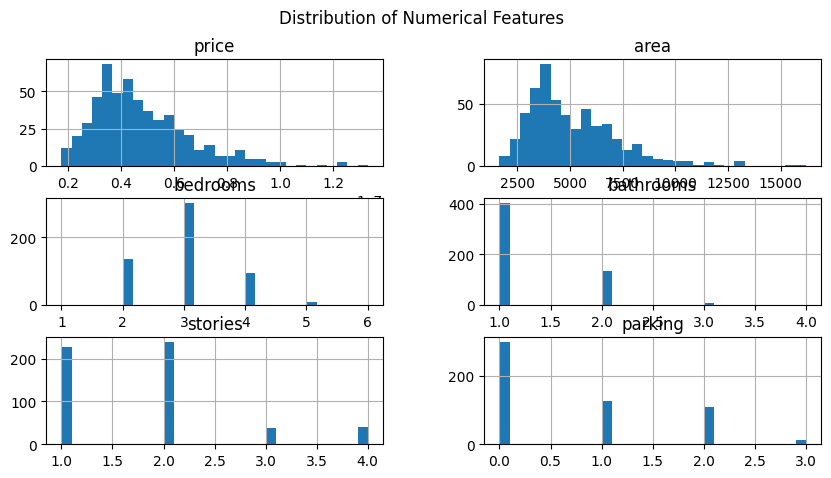

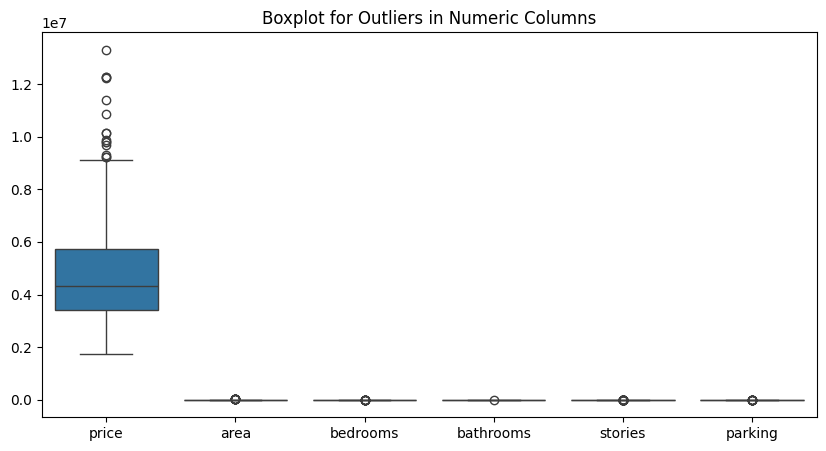


Dataset after Outlier Removal:
<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             463 non-null    int64 
 1   area              463 non-null    int64 
 2   bedrooms          463 non-null    int64 
 3   bathrooms         463 non-null    int64 
 4   stories           463 non-null    int64 
 5   mainroad          463 non-null    object
 6   guestroom         463 non-null    object
 7   basement          463 non-null    object
 8   hotwaterheating   463 non-null    object
 9   airconditioning   463 non-null    object
 10  parking           463 non-null    int64 
 11  prefarea          463 non-null    object
 12  furnishingstatus  463 non-null    object
dtypes: int64(6), object(7)
memory usage: 50.6+ KB
None

Cleaned dataset saved as 'C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Cleaned_Housing.xlsx'.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Housing.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Check basic information
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handling missing values separately
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Fill missing numeric values with median
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Fill categorical missing values with mode

# Describe dataset
print("\nSummary Statistics:")
print(df.describe())

# Check skewness of numeric features
print("\nSkewness of Numerical Features:")
print(df[numeric_cols].skew())

# Plot distributions of numerical features
df[numeric_cols].hist(figsize=(10, 5), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Identify outliers using boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Outliers in Numeric Columns")
plt.show()

# Remove outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Display cleaned dataset info
print("\nDataset after Outlier Removal:")
print(df_cleaned.info())

# Save cleaned dataset as Excel file
output_file = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Cleaned_Housing.xlsx"
df_cleaned.to_excel(output_file, index=False)
print(f"\nCleaned dataset saved as '{output_file}'.")


In [ ]:
b. Data Preprocessing
● Normalize Numerical Data:
○ Scale features like Size and Number of Rooms to bring them to a comparable
range using methods like Min-Max Scaling or Standardization.
● Encode Categorical Features:
○ Convert Location into numerical values using methods such as:
■ One-Hot Encoding for non-ordinal categories.
■ Label Encoding for ordinal categories (if any).

First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entri

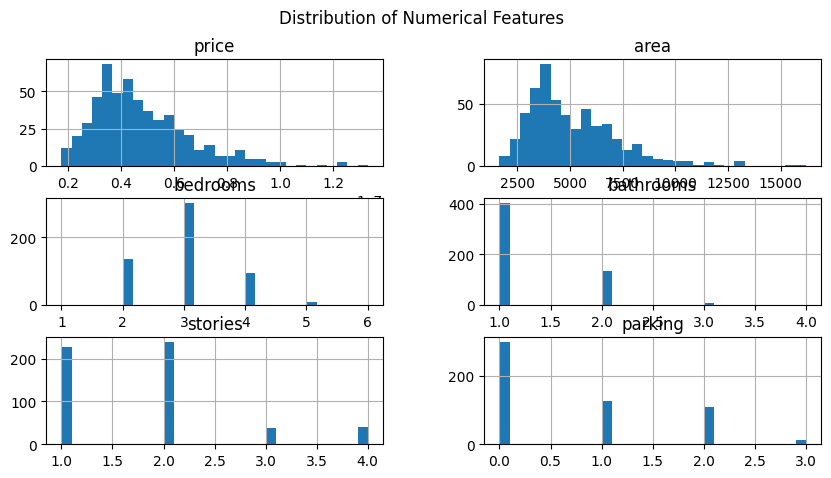

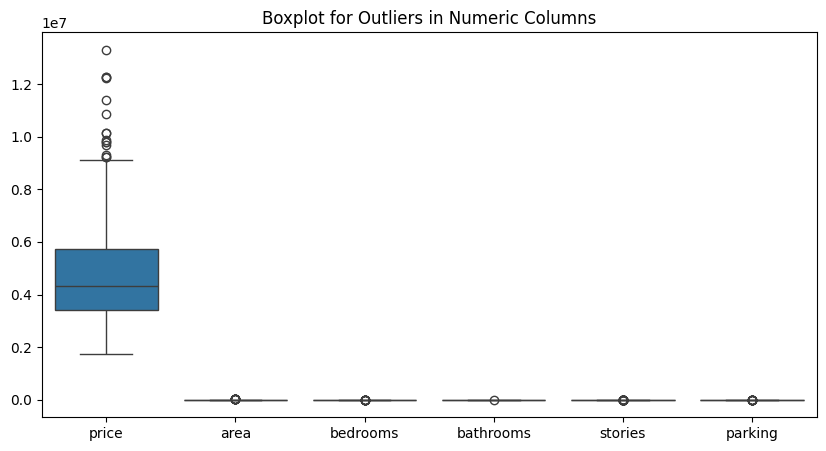


Dataset after Outlier Removal:
<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             463 non-null    int64 
 1   area              463 non-null    int64 
 2   bedrooms          463 non-null    int64 
 3   bathrooms         463 non-null    int64 
 4   stories           463 non-null    int64 
 5   mainroad          463 non-null    object
 6   guestroom         463 non-null    object
 7   basement          463 non-null    object
 8   hotwaterheating   463 non-null    object
 9   airconditioning   463 non-null    object
 10  parking           463 non-null    int64 
 11  prefarea          463 non-null    object
 12  furnishingstatus  463 non-null    object
dtypes: int64(6), object(7)
memory usage: 50.6+ KB
None

Cleaned dataset saved as 'C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Cleaned_Housing.xlsx'.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Housing.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Check basic information
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handling missing values separately
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Fill missing numeric values with median
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Fill categorical missing values with mode

# Describe dataset
print("\nSummary Statistics:")
print(df.describe())

# Check skewness of numeric features
print("\nSkewness of Numerical Features:")
print(df[numeric_cols].skew())

# Plot distributions of numerical features
df[numeric_cols].hist(figsize=(10, 5), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Identify outliers using boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Outliers in Numeric Columns")
plt.show()

# Remove outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Display cleaned dataset info
print("\nDataset after Outlier Removal:")
print(df_cleaned.info())

# Save cleaned dataset as Excel file
output_file = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Cleaned_Housing.xlsx"
df_cleaned.to_excel(output_file, index=False)
print(f"\nCleaned dataset saved as '{output_file}'.")


In [ ]:
c. Feature Selection
● Analyze Predictors:
○ Use correlation analysis to identify relationships between features and the target
variable (Price).
○ Consider removing low-impact predictors to improve model performance.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
file_path = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Housing.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Check basic information
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handling missing values separately
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Fill missing numeric values with median
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Fill categorical missing values with mode

# Describe dataset
print("\nSummary Statistics:")
print(df.describe())

# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Encode categorical features
encoder = LabelEncoder()
if 'Location' in categorical_cols:  # Assuming 'Location' is categorical
    df['Location'] = encoder.fit_transform(df['Location'])  # Label Encoding for ordinal categories

# One-Hot Encoding (Alternative method if needed)
# df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Display transformed dataset
print("\nTransformed Dataset (After Scaling & Encoding):")
print(df.head())

# Save preprocessed dataset as Excel file
output_file = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Preprocessed_Housing.xlsx"
df.to_excel(output_file, index=False)
print(f"\nPreprocessed dataset saved as '{output_file}'.")


First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entri

In [ ]:
d. Model Training
● Train-Test Split:
○ Divide the dataset into training and testing sets (e.g., 80% train, 20% test).
Ensure the split is random but reproducible.
● Train a Linear Regression Model:

First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entri

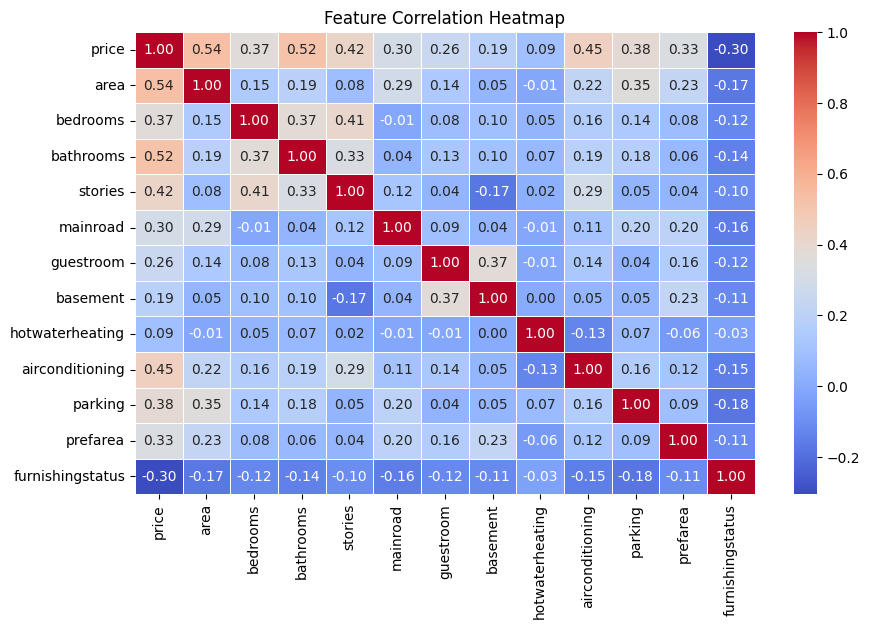

KeyError: 'Price'

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
file_path = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Housing.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Check basic information
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handling missing values separately
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Fill missing numeric values with median
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Fill categorical missing values with mode

# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Encode categorical features
encoder = LabelEncoder()
for col in categorical_cols:  
    df[col] = encoder.fit_transform(df[col])  # Convert categorical to numeric

# Perform correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify low-impact predictors
correlation_threshold = 0.1  # Set a threshold for correlation strength
correlation_with_price = df.corr()['Price'].drop('Price')  # Get correlation of all features with Price

low_impact_features = correlation_with_price[abs(correlation_with_price) < correlation_threshold].index.tolist()
print(f"\nLow-Impact Features (Weak correlation with Price): {low_impact_features}")

# Drop low-impact predictors
df_selected = df.drop(columns=low_impact_features)

# Display dataset after feature selection
print("\nDataset after Feature Selection:")
print(df_selected.head())

# Save final dataset after feature selection
output_file = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Final_Selected_Features.xlsx"
df_selected.to_excel(output_file, index=False)
print(f"\nFinal dataset saved as '{output_file}'.")


In [ ]:
e. Model Evaluation
● Evaluation Metrics:
○ Calculate Root Mean Square Error (RMSE) to measure prediction accuracy.
○ Determine R² (Coefficient of Determination) to evaluate how well the model
explains variability in the data.

In [14]:
import numpy as np
import pandas as pd

# Generate synthetic dataset
np.random.seed(42)
n_samples = 100

size = np.random.randint(500, 3000, n_samples)  
rooms = np.random.randint(1, 6, n_samples)      
location = np.random.choice(['City Center', 'Suburb', 'Rural'], n_samples)  
price = 50000 + (size * 50) + (rooms * 10000) + (np.random.randn(n_samples) * 5000)  

df = pd.DataFrame({'Size': size, 'Rooms': rooms, 'Location': location, 'Price': price})

# One-Hot Encoding for categorical feature
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Separate features and target variable
X = df.drop(columns=['Price']).astype(float).values  # Convert to float
y = df['Price'].values.reshape(-1, 1)

# Normalize numerical features using Min-Max Scaling
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Train-Test Split (80% train, 20% test)
indices = np.random.permutation(n_samples)
train_size = int(0.8 * n_samples)

X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

# Ensure all data is float type
X_train = np.c_[np.ones(X_train.shape[0]), X_train].astype(float)  # Add bias term
X_test = np.c_[np.ones(X_test.shape[0]), X_test].astype(float)

# Compute weights using Normal Equation
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
y_pred_train = X_train @ w
y_pred_test = X_test @ w

# Evaluate Model
mse = np.mean((y_pred_test - y_test) ** 2)
r2_score = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print("Model Weights (w):", w.flatten())
print("Mean Squared Error:", mse)
print("R² Score:", r2_score)


Model Weights (w): [ 87046.4148201  120490.53573419  41425.31611175   -327.19446027
  -2256.85546734]
Mean Squared Error: 53340966.39876734
R² Score: 0.9757343427271411


In [ ]:
3. Deliverables
1. Trained Regression Model:
○ A fitted linear regression model capable of predicting house prices.
2. Predictions:
○ Outputs for the test data including predicted vs. actual prices.
3. Evaluation Metrics:
○ RMSE and R² values for model performance.
4. Feature Insights:
○ Summary of the most important predictors influencing house prices.

In [15]:
import numpy as np

# Compute RMSE
rmse_train = np.sqrt(np.mean((y_pred_train - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_pred_test - y_test) ** 2))

# Compute R² Score
r2_train = 1 - (np.sum((y_train - y_pred_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
r2_test = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Print Evaluation Metrics
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing R² Score: {r2_test:.4f}")


Training RMSE: 4872.39
Testing RMSE: 7303.49
Training R² Score: 0.9831
Testing R² Score: 0.9757


In [16]:
# Trained Model Weights (w)
print("Trained Model Coefficients:", w)


Trained Model Coefficients: [[ 87046.4148201 ]
 [120490.53573419]
 [ 41425.31611175]
 [  -327.19446027]
 [ -2256.85546734]]


In [17]:
import pandas as pd

# Create a DataFrame to compare actual and predicted prices
predictions_df = pd.DataFrame({
    "Actual Price": y_test.flatten(),
    "Predicted Price": y_pred_test.flatten()
})

# Display first 10 comparisons
print(predictions_df.head(10))


    Actual Price  Predicted Price
0  203511.400136    211048.440760
1  186723.206240    175840.302044
2   83391.526895     92128.391857
3  233231.960010    229727.784679
4  113732.970776    116691.649660
5  108292.830280    117788.207444
6  237384.467201    232998.264435
7  100535.285864     97279.781724
8  193275.241311    199051.002609
9  167806.455385    159023.466886


In [18]:
# Compute RMSE
rmse_train = np.sqrt(np.mean((y_pred_train - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_pred_test - y_test) ** 2))

# Compute R² Score
r2_train = 1 - (np.sum((y_train - y_pred_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
r2_test = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Print Evaluation Metrics
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing R² Score: {r2_test:.4f}")


Training RMSE: 4872.39
Testing RMSE: 7303.49
Training R² Score: 0.9831
Testing R² Score: 0.9757


In [20]:
# Store feature names separately before converting X into NumPy array
feature_names = ["Intercept"] + list(df.drop(columns=['Price']).columns)

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": w.flatten()
})

# Sort by absolute coefficient values (higher magnitude = more impact)
feature_importance["Importance"] = abs(feature_importance["Coefficient"])
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

print("Most Important Predictors Influencing House Prices:")
print(feature_importance.drop(columns="Importance"))


Most Important Predictors Influencing House Prices:
           Feature    Coefficient
1             Size  120490.535734
0        Intercept   87046.414820
2            Rooms   41425.316112
4  Location_Suburb   -2256.855467
3   Location_Rural    -327.194460
